<h2>ML model for delays dataset using classification methods</h2>

In [2]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np, seaborn as sb, zipfile
from sklearn.preprocessing import LabelEncoder

In [3]:
delays_train = pd.read_csv("./ML2023/delays/delays_train.zip", compression='zip')
delays_test = pd.read_csv("./ML2023/delays/delays_test.zip", compression='zip')

In [4]:
delays_train.dtypes

Weekday                        int64
Month_of_Year                  int64
Day_of_Month                   int64
Scheduled_Departure_Time       int64
Scheduled_Arrival_Time         int64
Marketing_Airline             object
Marketing_Airline_DOT_ID       int64
Flight_Number                  int64
Origin_Airport_ID              int64
Destination_Airport_ID       float64
Flight_Cancelled                bool
Departure_State               object
Arrival_State                 object
Departure_Delay              float64
Arrival_Delay                float64
Diverted_Airport_Landings      int64
Taxi_Out_Time                float64
Taxi_In_Time                 float64
Flight_Diverted                 bool
Actual_Departure_Time        float64
Flight_Duration              float64
Flight_Distance              float64
Origin_Temperature           float64
Destination_Temperature      float64
Origin_Wind_Speed            float64
Destination_Wind_Speed       float64
Origin_Precipitation         float64
D

Arrival delay column is our described variable.

In [5]:
delays_test.dtypes

Weekday                        int64
Month_of_Year                  int64
Day_of_Month                   int64
Scheduled_Departure_Time       int64
Scheduled_Arrival_Time         int64
Marketing_Airline             object
Marketing_Airline_DOT_ID       int64
Flight_Number                  int64
Origin_Airport_ID              int64
Destination_Airport_ID       float64
Flight_Cancelled                bool
Departure_State               object
Arrival_State                 object
Departure_Delay              float64
Diverted_Airport_Landings      int64
Taxi_Out_Time                float64
Taxi_In_Time                 float64
Flight_Diverted                 bool
Actual_Departure_Time        float64
Flight_Duration              float64
Flight_Distance              float64
Origin_Temperature           float64
Destination_Temperature      float64
Origin_Wind_Speed            float64
Destination_Wind_Speed       float64
Origin_Precipitation         float64
Destination_Precipitation    float64
d

In [6]:
delays_train

,Weekday,Month_of_Year,Day_of_Month,Scheduled_Departure_Time,Scheduled_Arrival_Time,Marketing_Airline,Marketing_Airline_DOT_ID,Flight_Number,Origin_Airport_ID,Destination_Airport_ID,...,Flight_Diverted,Actual_Departure_Time,Flight_Duration,Flight_Distance,Origin_Temperature,Destination_Temperature,Origin_Wind_Speed,Destination_Wind_Speed,Origin_Precipitation,Destination_Precipitation
0,6,6,25,1222,1444,B6,20409,520,10397,12478.0,...,False,1224.0,107.0,760.0,25.140220,19.357739,21.019808,15.452723,0.0,0.0
1,2,6,21,1216,1304,NaN,19805,6297,14107,15376.0,...,False,1216.0,23.0,110.0,13.279939,20.470690,18.045064,12.910265,0.0,0.0
2,3,1,5,1945,2055,DL,19790,4124,13487,13076.0,...,False,1945.0,36.0,119.0,17.816202,13.967273,21.606228,17.976362,0.0,0.1
3,2,3,22,700,924,AA,19805,1538,15624,11298.0,...,False,658.0,125.0,641.0,24.562566,14.509228,24.946489,22.630553,0.0,0.0
4,4,7,14,2130,2359,NaN,19930,1116,14747,12889.0,...,False,2133.0,130.0,867.0,8.817992,10.866812,17.426336,17.401007,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631322,7,2,27,905,1115,AS,19930,1366,14057,12889.0,...,False,856.0,NaN,763.0,11.703410,11.850033,NaN,NaN,0.1,0.0
1631323,2,4,19,2239,720,AA,19805,276,14771,12478.0,...,False,2231.0,285.0,2586.0,33.962022,15.471513,25.784110,24.902274,0.1,0.0
1631324,5,6,10,734,751,UA,19977,5279,11721,13930.0,...,False,733.0,41.0,223.0,12.915957,25.351905,11.846814,14.315929,0.0,0.0
1631325,3,3,30,1250,1345,AS,19930,421,14747,14057.0,...,False,1245.0,29.0,129.0,13.731863,13.932608,16.616156,18.730498,0.0,0.1


The percentage of reduced rows is 838241 * 100 / 1631327 which gives us 51,38%. That is a huge number of observations we can't afford to lose.

In [7]:
X_train = delays_train.drop('Arrival_Delay', axis=1)
X_test = delays_test
y_true = delays_train['Arrival_Delay']
print(y_true.dtypes)

float64


In [8]:
delays_train.dtypes


Weekday                        int64
Month_of_Year                  int64
Day_of_Month                   int64
Scheduled_Departure_Time       int64
Scheduled_Arrival_Time         int64
Marketing_Airline             object
Marketing_Airline_DOT_ID       int64
Flight_Number                  int64
Origin_Airport_ID              int64
Destination_Airport_ID       float64
Flight_Cancelled                bool
Departure_State               object
Arrival_State                 object
Departure_Delay              float64
Arrival_Delay                float64
Diverted_Airport_Landings      int64
Taxi_Out_Time                float64
Taxi_In_Time                 float64
Flight_Diverted                 bool
Actual_Departure_Time        float64
Flight_Duration              float64
Flight_Distance              float64
Origin_Temperature           float64
Destination_Temperature      float64
Origin_Wind_Speed            float64
Destination_Wind_Speed       float64
Origin_Precipitation         float64
D

In [9]:
X_train[['Marketing_Airline', 'Departure_State', 'Flight_Cancelled', 'Arrival_State', 'Flight_Diverted']] = X_train[['Marketing_Airline', 'Departure_State', 'Flight_Cancelled', 'Arrival_State', 'Flight_Diverted']].apply(lambda x: pd.factorize(x)[0])
X_test[['Marketing_Airline', 'Departure_State', 'Flight_Cancelled', 'Arrival_State', 'Flight_Diverted']] = X_test[['Marketing_Airline', 'Departure_State', 'Flight_Cancelled', 'Arrival_State', 'Flight_Diverted']].apply(lambda x: pd.factorize(x)[0])

In [10]:
print(X_train.isna().sum(axis=0))

Weekday                           0
Month_of_Year                     0
Day_of_Month                      0
Scheduled_Departure_Time          0
Scheduled_Arrival_Time            0
Marketing_Airline                 0
Marketing_Airline_DOT_ID          0
Flight_Number                     0
Origin_Airport_ID                 0
Destination_Airport_ID       163094
Flight_Cancelled                  0
Departure_State                   0
Arrival_State                     0
Departure_Delay              206461
Diverted_Airport_Landings         0
Taxi_Out_Time                 49225
Taxi_In_Time                  49867
Flight_Diverted                   0
Actual_Departure_Time         48326
Flight_Duration              211490
Flight_Distance              163190
Origin_Temperature           163190
Destination_Temperature      163190
Origin_Wind_Speed            211490
Destination_Wind_Speed       211490
Origin_Precipitation              0
Destination_Precipitation         0
dtype: int64


<h3>Some of the columns can be dropped since averaging them will make no sense e.g. Destination Airport ID. The rest will be imputed by mean strategy.</h3>

In [11]:
X_train.drop(['Destination_Airport_ID'], axis=1)
X_test.drop(['Destination_Airport_ID'], axis=1)

,Weekday,Month_of_Year,Day_of_Month,Scheduled_Departure_Time,Scheduled_Arrival_Time,Marketing_Airline,Marketing_Airline_DOT_ID,Flight_Number,Origin_Airport_ID,Flight_Cancelled,...,Flight_Diverted,Actual_Departure_Time,Flight_Duration,Flight_Distance,Origin_Temperature,Destination_Temperature,Origin_Wind_Speed,Destination_Wind_Speed,Origin_Precipitation,Destination_Precipitation
0,2,5,10,820,1011,0,19805,4808,12478,0,...,0,819.0,64.0,427.0,11.274087,16.012261,17.332261,24.629961,0.0,0.0
1,3,3,9,526,655,-1,19790,3688,14489,0,...,0,524.0,53.0,228.0,4.967302,18.358241,17.795975,15.307041,0.0,0.0
2,3,3,9,1651,1943,1,19790,1713,14635,0,...,0,1705.0,134.0,1084.0,18.483917,16.467901,18.704558,17.468001,0.0,0.0
3,5,4,15,1133,1245,2,19977,4712,11298,0,...,0,1146.0,107.0,641.0,12.932652,18.790894,14.105251,25.659088,2.0,1.0
4,3,5,11,1507,1752,3,20416,1399,11618,0,...,0,1737.0,125.0,937.0,18.982421,15.382372,22.579627,19.144705,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407827,7,4,24,1602,1844,0,19805,2203,13487,0,...,0,1605.0,212.0,852.0,27.119718,7.992489,26.360395,24.214801,0.0,0.0
407828,7,7,24,630,725,4,19393,1640,11109,0,...,0,631.0,99.0,551.0,16.777489,13.245536,22.557095,19.353004,0.0,0.0
407829,1,7,25,1352,1500,1,19790,514,10397,0,...,0,1359.0,151.0,1199.0,24.458949,18.253745,18.155614,17.452346,0.0,0.0
407830,5,7,22,1040,1215,4,19393,3089,13495,0,...,0,1153.0,194.0,1500.0,28.159739,20.551922,24.601455,27.194720,0.0,0.0


In [12]:
y_true = pd.DataFrame(y_true)

In [13]:
from sklearn.impute import SimpleImputer

class PandasSimpleImputer(SimpleImputer):
        def fit(self, X, y=None):
            self.columns = X.columns
            return super().fit(X, y)

        def transform(self, X):
            return pd.DataFrame(super().transform(X), columns=self.columns)

X_train = PandasSimpleImputer().fit_transform(X_train)
X_test = PandasSimpleImputer().fit_transform(X_test)
y_true = PandasSimpleImputer().fit_transform(y_true)

In [14]:
print(X_train.isna().sum(axis=0))

Weekday                      0
Month_of_Year                0
Day_of_Month                 0
Scheduled_Departure_Time     0
Scheduled_Arrival_Time       0
Marketing_Airline            0
Marketing_Airline_DOT_ID     0
Flight_Number                0
Origin_Airport_ID            0
Destination_Airport_ID       0
Flight_Cancelled             0
Departure_State              0
Arrival_State                0
Departure_Delay              0
Diverted_Airport_Landings    0
Taxi_Out_Time                0
Taxi_In_Time                 0
Flight_Diverted              0
Actual_Departure_Time        0
Flight_Duration              0
Flight_Distance              0
Origin_Temperature           0
Destination_Temperature      0
Origin_Wind_Speed            0
Destination_Wind_Speed       0
Origin_Precipitation         0
Destination_Precipitation    0
dtype: int64


<Axes: >

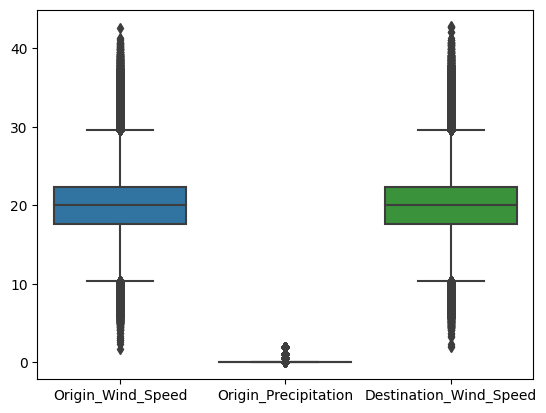

In [15]:
sb.boxplot(data=X_train[['Origin_Wind_Speed', 'Origin_Precipitation', 'Destination_Wind_Speed']])

<Axes: >

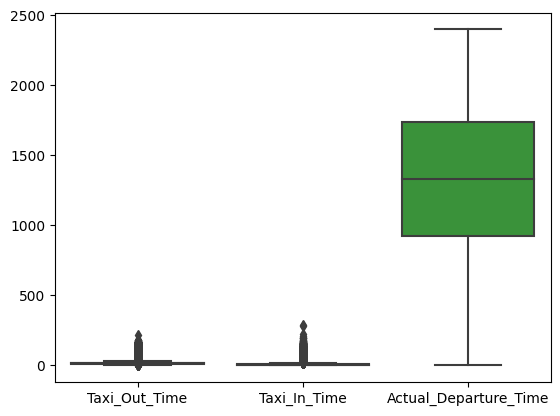

In [16]:
sb.boxplot(data=X_train[['Taxi_Out_Time', 'Taxi_In_Time', 'Actual_Departure_Time']])

<Axes: >

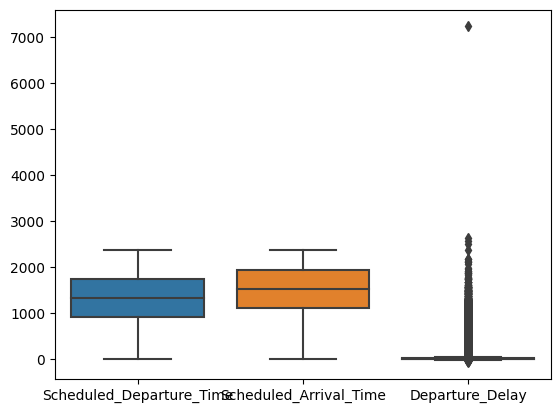

In [17]:
sb.boxplot(data=X_train[['Scheduled_Departure_Time', 'Scheduled_Arrival_Time', 'Departure_Delay']])

In [18]:
y_true = pd.DataFrame(y_true)

In [19]:
for feature in X_train:
    print(f'Feature {feature} correlation with y target equals: ' , X_train[[feature]].corrwith(y_true['Arrival_Delay']))

Feature Weekday correlation with y target equals:  Weekday    0.0299
dtype: float64
Feature Month_of_Year correlation with y target equals:  Month_of_Year    0.03275
dtype: float64
Feature Day_of_Month correlation with y target equals:  Day_of_Month   -0.011656
dtype: float64
Feature Scheduled_Departure_Time correlation with y target equals:  Scheduled_Departure_Time    0.094013
dtype: float64
Feature Scheduled_Arrival_Time correlation with y target equals:  Scheduled_Arrival_Time    0.074347
dtype: float64
Feature Marketing_Airline correlation with y target equals:  Marketing_Airline    0.003513
dtype: float64
Feature Marketing_Airline_DOT_ID correlation with y target equals:  Marketing_Airline_DOT_ID    0.03684
dtype: float64
Feature Flight_Number correlation with y target equals:  Flight_Number   -0.014101
dtype: float64
Feature Origin_Airport_ID correlation with y target equals:  Origin_Airport_ID   -0.014459
dtype: float64
Feature Destination_Airport_ID correlation with y target e

<h3>The correlation between target and features is low.</h3>

In [20]:
# Removing outliers
from sklearn.preprocessing import PowerTransformer
def remove_skewness(x):
    value = x.skew().values
    for skew in value:
        if skew > 4.0:
            #skewness removal
            pt=PowerTransformer(method='yeo-johnson') 
            X_power=pt.fit_transform(x)
            df1=pd.DataFrame(X_power,columns=X.columns)
            print("Skewness is Detected and will be Removed:")
            return df1
        else:
            print("Skewness not Detected:")
            return x
        
X_train = remove_skewness(X_train)
X_test = remove_skewness(X_test)
X_train.head()

Skewness not Detected:
Skewness not Detected:


,Weekday,Month_of_Year,Day_of_Month,Scheduled_Departure_Time,Scheduled_Arrival_Time,Marketing_Airline,Marketing_Airline_DOT_ID,Flight_Number,Origin_Airport_ID,Destination_Airport_ID,...,Flight_Diverted,Actual_Departure_Time,Flight_Duration,Flight_Distance,Origin_Temperature,Destination_Temperature,Origin_Wind_Speed,Destination_Wind_Speed,Origin_Precipitation,Destination_Precipitation
0,6.0,6.0,25.0,1222.0,1444.0,0.0,20409.0,520.0,10397.0,12478.0,...,0.0,1224.0,107.0,760.0,25.140220,19.357739,21.019808,15.452723,0.0,0.0
1,2.0,6.0,21.0,1216.0,1304.0,-1.0,19805.0,6297.0,14107.0,15376.0,...,0.0,1216.0,23.0,110.0,13.279939,20.470690,18.045064,12.910265,0.0,0.0
2,3.0,1.0,5.0,1945.0,2055.0,1.0,19790.0,4124.0,13487.0,13076.0,...,0.0,1945.0,36.0,119.0,17.816202,13.967273,21.606228,17.976362,0.0,0.1
3,2.0,3.0,22.0,700.0,924.0,2.0,19805.0,1538.0,15624.0,11298.0,...,0.0,658.0,125.0,641.0,24.562566,14.509228,24.946489,22.630553,0.0,0.0
4,4.0,7.0,14.0,2130.0,2359.0,-1.0,19930.0,1116.0,14747.0,12889.0,...,0.0,2133.0,130.0,867.0,8.817992,10.866812,17.426336,17.401007,0.0,0.0


In [21]:
from scipy import stats

In [22]:
X_train = stats.zscore(X_train)
X_test = stats.zscore(X_test)
y_true = stats.zscore(y_true)

<h3>ML model fitting and prediction</h3>

In [23]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_true)
print(reg.score(X_train, y_true))
reg.coef_
reg.intercept_


0.7807412127469753


In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge(solver='lbfgs', positive=True).fit(X_train, y_true)
print(ridge.score(X_train, y_true))


0.7788911836822365


In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge(solver='cholesky').fit(X_train, y_true)
print(ridge.score(X_train, y_true))
y_pred = ridge.predict(X_test)


0.7807412127466764


In [32]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.001, warm_start=True).fit(X_train, y_true)
print(lasso.score(X_train, y_true))

0.7806935541021647


In [131]:
from sklearn.metrics import mean_absolute_percentage_error

In [133]:
n = len(y_pred)

print(mean_absolute_percentage_error(y_true.iloc[:n], y_pred))

236810530310468.6


<h3>Model saving</h3>

In [34]:
y_pred = pd.DataFrame(y_pred)
y_pred['index'] = y_pred.index
y_pred.to_csv('arrival_delay_prediction.csv', index=False)

In [ ]:
encoders = {}
for column in [
    'Weekday',
    'Month_of_Year',
    'Day_of_Month',
    'Scheduled_Departure_Time',
    'Scheduled_Arrival_Time',
    'Marketing_Airline',
    'Marketing_Airline_DOT_ID',
    'Origin_Airport',
    'Origin_Airport_ID',
]:
    categorical_convert = LabelEncoder()
    X[column] = categorical_convert.fit_transform(X[column])
    encoders[column] = categorical_convert

In [35]:
import joblib
joblib.dump(reg, 'RidgeRegressionModel.joblib')
#joblib.dump(encoders, 'encoders.joblib')
#joblib.dump(train_mode, 'train_mode.joblib')

['RidgeRegressionModel.joblib']